In [150]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
files = [file for file in os.listdir(r"C:\Users\hamz2\Downloads\data-sales-main\data-sales-main")]
for file in files :
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = r"C:\Users\hamz2\Downloads\data-sales-main\data-sales-main"
# create empty database 
all_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data , current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [4]:
January_data = pd.read_csv(path+'/Sales_January_2019.csv')


In [5]:
January_data.shape

(9723, 6)

In [6]:
all_data.to_csv(path+'/all_data.csv' , index = False)



In [7]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [10]:
all_data =all_data.dropna(how = 'all')

In [11]:
all_data.shape

(558915, 6)

In [156]:
# Which month we had the best turnover ?

In [13]:
def month(x):
   return x.split('/')[0]

In [14]:
#example
month('04/19/19 08:46'	)

'04'

In [15]:
# create a column called Month , take the order date and apply on it month function 
all_data['Month']= all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [16]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [17]:
# remove the month called 'Orderd Date'

In [18]:
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [19]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [20]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data.dtypes

C:\Users\hamz2\AppData\Local\Temp\ipykernel_43204\756156393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)
C:\Users\hamz2\AppData\Local\Temp\ipykernel_43204\756156393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [21]:
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each'] 
all_data['Sales']

C:\Users\hamz2\AppData\Local\Temp\ipykernel_43204\2833175418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']


0         23.90
2         99.99
3        600.00
4         11.99
5         11.99
          ...  
11681      8.97
11682    700.00
11683    700.00
11684    379.99
11685     11.95
Name: Sales, Length: 557850, dtype: float64

In [22]:
#group by months 
all_data.groupby('Month')['Sales'].sum()

Month
01     5466770.19
02     6606067.26
03     8421301.14
04    10172010.72
05     9457820.25
06     7733406.78
07     7943327.28
08     6733403.64
09     6292680.39
10    11210180.64
11     9598809.60
12    13840330.02
Name: Sales, dtype: float64

In [23]:
max(all_data.groupby('Month')['Sales'].sum())

13840330.02

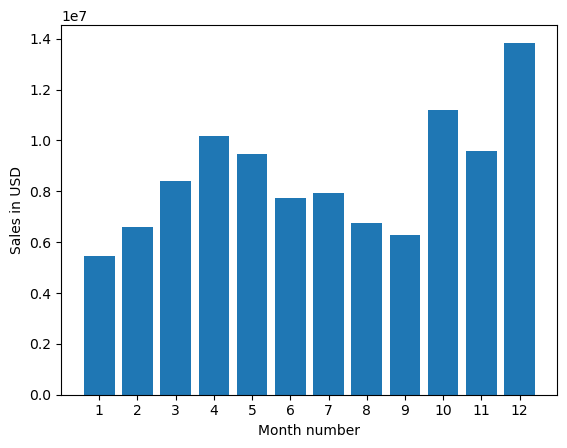

In [24]:
# visual sales in each month 
months = range(1,13) 
plt.bar(months, all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

In [158]:
# WHICH CITY HAS MADE THE TOP SALES ?

In [26]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [27]:
#example pick the city from the full address :
'917 1st St, Dallas, TX 75001	' .split(',')[1]

' Dallas'

In [28]:
def city(x):
    return x.split(',')[1]

In [29]:
all_data['City'] = all_data['Purchase Address'].apply(city)
all_data['City']

C:\Users\hamz2\AppData\Local\Temp\ipykernel_43204\4220368501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(city)


0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
11681       Los Angeles
11682     San Francisco
11683     San Francisco
11684     San Francisco
11685     San Francisco
Name: City, Length: 557850, dtype: object

In [30]:
all_data.groupby('City')['City'].count()

City
Atlanta           44643
Austin            29715
Boston            59802
Dallas            44460
Los Angeles       88815
New York City     74628
Portland          37395
San Francisco    134196
Seattle           44196
Name: City, dtype: int64

In [31]:
all_data.groupby('City')['City'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='City')

In [32]:
all_data.groupby('City')['City'].count().values

array([ 44643,  29715,  59802,  44460,  88815,  74628,  37395, 134196,
        44196], dtype=int64)

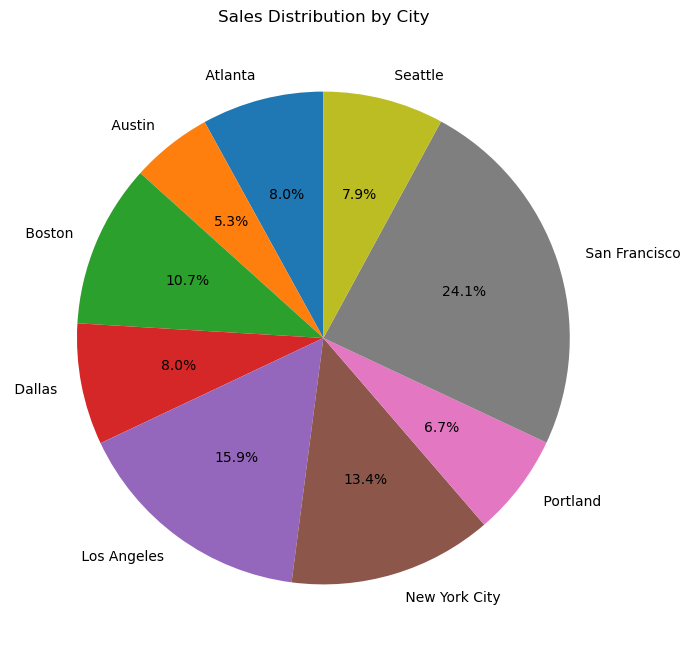

In [33]:
plt.figure(figsize=(8,8))
plt.pie(
    all_data.groupby('City')['City'].count().values, 
    labels=all_data.groupby('City')['City'].count().index, 
    autopct='%1.1f%%', startangle=90
)
plt.title('Sales Distribution by City')
plt.show()


In [34]:
# In Which Moment we have to do some adds to increace the sales ?

In [35]:
all_data['Hour']= pd.to_datetime(all_data['Order Date']).dt.hour


C:\Users\hamz2\AppData\Local\Temp\ipykernel_43204\528513991.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']= pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\hamz2\AppData\Local\Temp\ipykernel_43204\528513991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']= pd.to_datetime(all_data['Order Date']).dt.hour


In [36]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco,17


In [37]:
all_data.sort_values(by='Hour', ascending=False)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
317903,204125,34in Ultrawide Monitor,1,379.99,05/19/19 23:13,"969 Lakeview St, New York City, NY 10001",05,379.99,New York City,23
9581,159653,27in 4K Gaming Monitor,1,389.99,02/11/19 23:49,"603 Ridge St, San Francisco, CA 94016",02,389.99,San Francisco,23
9392,159468,USB-C Charging Cable,1,11.95,02/02/19 23:38,"28 Lake St, New York City, NY 10001",02,11.95,New York City,23
9407,159483,Apple Airpods Headphones,1,150.00,02/21/19 23:09,"9 8th St, Dallas, TX 75001",02,150.00,Dallas,23
9408,159484,AA Batteries (4-pack),1,3.84,02/11/19 23:37,"983 Johnson St, Los Angeles, CA 90001",02,3.84,Los Angeles,23
...,...,...,...,...,...,...,...,...,...,...
7292,285770,Bose SoundSport Headphones,1,99.99,11/28/19 00:47,"682 Main St, Seattle, WA 98101",11,99.99,Seattle,0
307368,194123,Apple Airpods Headphones,1,150.00,05/24/19 00:34,"546 Meadow St, Atlanta, GA 30301",05,150.00,Atlanta,0
307403,194157,AA Batteries (4-pack),1,3.84,05/30/19 00:21,"622 West St, Dallas, TX 75001",05,3.84,Dallas,0
307480,194226,USB-C Charging Cable,1,11.95,05/16/19 00:10,"883 Sunset St, New York City, NY 10001",05,11.95,New York City,0


In [38]:
keys=[] #Will hold each unique hour (0-23 if dealing with a full day).
hours=[] # Will store how many orders were placed in each hour.

for key , hour in all_data.groupby('Hour'):
    keys.append(key) # Adds the current hour to the list
    hours.append(len(hour)) # Counts how many orders happened in that hour and stores it
hours

[11730,
 7050,
 3729,
 2493,
 2562,
 3963,
 7446,
 12033,
 18768,
 26244,
 32832,
 37233,
 37761,
 36387,
 32952,
 30525,
 31152,
 32697,
 36840,
 38715,
 36684,
 32763,
 26466,
 18825]

Text(0, 0.5, 'Number of orders')

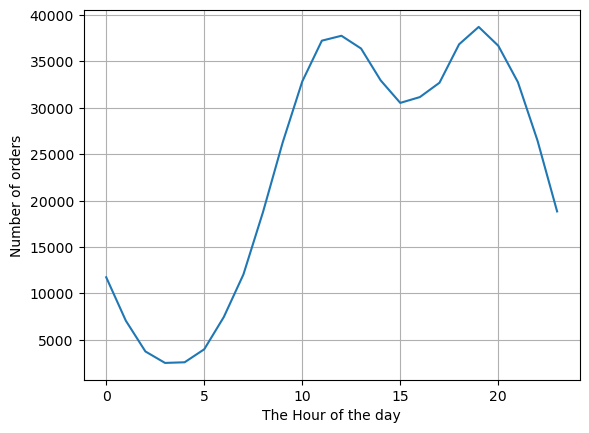

In [39]:
plt.grid()
plt.plot(keys , hours)
plt.xlabel('The Hour of the day')
plt.ylabel('Number of orders')

In [40]:
# so between 12 and 19 oclock there is a lot of sales , we can add ads in this time to increase sales 

In [41]:
# QST 4 : which product sold more  

<Axes: xlabel='Product'>

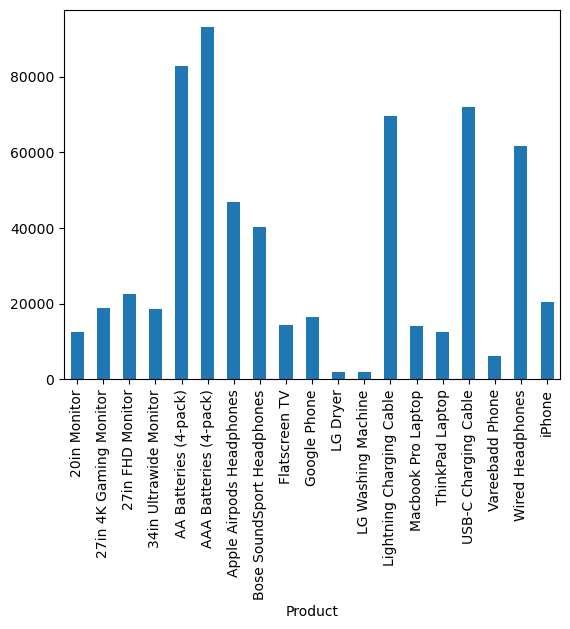

In [98]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind = 'bar')

In [100]:
# Batteries  sold more .... 

In [102]:
# let's see the impact of the price on sales 

In [120]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()  # la valeur moyenne des prices 

C:\Users\hamz2\AppData\Local\Temp\ipykernel_43204\3737563608.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

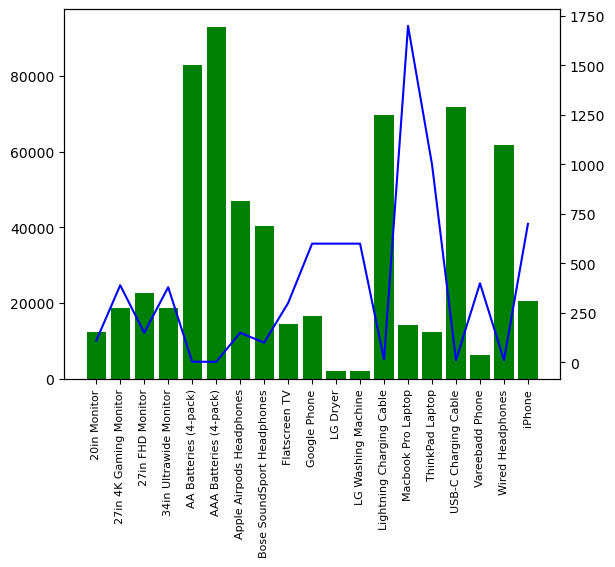

In [136]:
plt.figure(figsize = (40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity , color ='g')
ax2.plot (products , prices , 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)


In [142]:
# the more expensive the product, the more is less sold 